In [2]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

     |████████████████████████████████| 53 kB 1.4 MB/s 
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-dcdloxa6
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-dcdloxa6
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369389 sha256=e02cdbdb420b05d1c55ce042f9710ece0cd245a74ed63cc5fe61f931089175a1
  Stored in directory: /tmp/pip-ephem-wheel-cache-re0l33cm/wheels/fd/b9/c3/5b4470e35ed76e174bff77c92f91da82098d5e35fd5bc8cdac
Successfully built clip


In [3]:
import os
import numpy as np
import torch
import clip
import cv2
from PIL import Image

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 163MiB/s]


The example image in this notebook


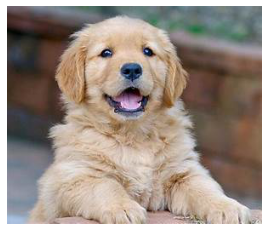

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
print("The example image in this notebook")
img1 = mpimg.imread("/content/drive/MyDrive/Transformer_CLIP/Golden_Retriever.jpeg") 

plt.imshow(img1)
plt.axis('off')

plt.show()

In [30]:
Class = ["dog", "cat", "rabbit","squirrel"]
image = preprocess(Image.open("/content/drive/MyDrive/Transformer_CLIP/Golden_Retriever.jpeg")).unsqueeze(0).to(device)
text = clip.tokenize(Class).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

res = 0
pos = -1
for j in range(len(probs[0])):
  if probs[0][j] > res:
    res = probs[0][j]
    pos = j


print("The options available are: " + str(Class))
for i in range(len(probs[0])):
  print("The probability of " + str(Class[i]) + " is " + str(probs[0][i]))

print("Model thinks this photo is most likely a " + Class[pos])

The options available are: ['dog', 'cat', 'rabbit', 'squirrel']
The probability of dog is 0.994
The probability of cat is 0.000643
The probability of rabbit is 0.00172
The probability of squirrel is 0.00353
Model thinks this photo is most likely a dog


In [31]:
Class = ["Labrador", "Siberian Husky","Boxer","Golden Retriever"]
image = preprocess(Image.open("/content/drive/MyDrive/Transformer_CLIP/Golden_Retriever.jpeg")).unsqueeze(0).to(device)
text = clip.tokenize(Class).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

res = 0
pos = -1
for j in range(len(probs[0])):
  if probs[0][j] > res:
    res = probs[0][j]
    pos = j


print("The options available are: " + str(Class))
for i in range(len(probs[0])):
  print("The probability of " + str(Class[i]) + " is " + str(probs[0][i]))

print("Model thinks this photo is most likely a " + Class[pos])

The options available are: ['Labrador', 'Siberian Husky', 'Boxer', 'Golden Retriever']
The probability of Labrador is 0.006096
The probability of Siberian Husky is 9.8e-06
The probability of Boxer is 0.0001676
The probability of Golden Retriever is 0.9937
Model thinks this photo is most likely a Golden Retriever


In [32]:
Class = ["Labrador", "Siberian Husky","Boxer","German Shepherd"]
image = preprocess(Image.open("/content/drive/MyDrive/Transformer_CLIP/Golden_Retriever.jpeg")).unsqueeze(0).to(device)
text = clip.tokenize(["Labrador", "Siberian Husky","Boxer","German Shepherd"]).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

res = 0
pos = -1
for j in range(len(probs[0])):
  if probs[0][j] > res:
    res = probs[0][j]
    pos = j


print("The options available are: " + str(Class))
for i in range(len(probs[0])):
  print("The probability of " + str(Class[i]) + " is " + str(probs[0][i]))

print("Model thinks this photo is most likely a " + Class[pos])

The options available are: ['Labrador', 'Siberian Husky', 'Boxer', 'German Shepherd']
The probability of Labrador is 0.915
The probability of Siberian Husky is 0.001464
The probability of Boxer is 0.02516
The probability of German Shepherd is 0.0585
Model thinks this photo is most likely a Labrador


In [35]:
Class = ["Golden Retriever is running", "Golden Retriever is playing","Golden Retriever is sitting","Golden Retriever is sleeping",
          "Siberian Huskyr is running", "Siberian Husky is playing","Siberian Husky is sitting","Siberian Husky is sleeping",
          "Labrador is running", "Labrador is playing","Labrador is sitting","Labrador is sleeping",
          "Boxer is running", "Boxer is playing","Boxer is sitting","Boxer is sleeping"]

In [37]:
image = preprocess(Image.open("/content/drive/MyDrive/Transformer_CLIP/Golden_Retriever.jpeg")).unsqueeze(0).to(device)
text = clip.tokenize(labels).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()
  
res = 0
pos = -1
for j in range(len(probs[0])):
  if probs[0][j] > res:
    res = probs[0][j]
    pos = j


print("The options available are: " + str(Class))
for i in range(len(probs[0])):
  print("P[" + str(Class[i]) + "] is " + str(probs[0][i]))

print("Model thinks this photo is most likely a " + Class[pos])

The options available are: ['Golden Retriever is running', 'Golden Retriever is playing', 'Golden Retriever is sitting', 'Golden Retriever is sleeping', 'Siberian Huskyr is running', 'Siberian Husky is playing', 'Siberian Husky is sitting', 'Siberian Husky is sleeping', 'Labrador is running', 'Labrador is playing', 'Labrador is sitting', 'Labrador is sleeping', 'Boxer is running', 'Boxer is playing', 'Boxer is sitting', 'Boxer is sleeping']
P[Golden Retriever is running] is 0.10535
P[Golden Retriever is playing] is 0.203
P[Golden Retriever is sitting] is 0.6553
P[Golden Retriever is sleeping] is 0.0159
P[Siberian Huskyr is running] is 7.75e-06
P[Siberian Husky is playing] is 9.31e-05
P[Siberian Husky is sitting] is 8.607e-05
P[Siberian Husky is sleeping] is 1.43e-06
P[Labrador is running] is 0.001677
P[Labrador is playing] is 0.011635
P[Labrador is sitting] is 0.006325
P[Labrador is sleeping] is 0.0003352
P[Boxer is running] is 5.734e-05
P[Boxer is playing] is 9.17e-05
P[Boxer is sitti

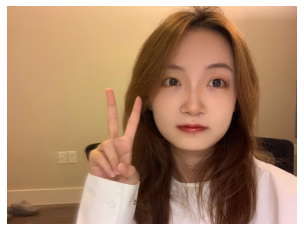

In [40]:
print("This is the photo of my teammate")
img1 = mpimg.imread("/content/drive/MyDrive/Transformer_CLIP/2.JPG") 

plt.imshow(img1)
plt.axis('off')

plt.show()

In [41]:
Class = ["dog", "cat", "rabbit","squirrel","human"]
image = preprocess(Image.open("/content/drive/MyDrive/Transformer_CLIP/2.JPG")).unsqueeze(0).to(device)
text = clip.tokenize(Class).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

res = 0
pos = -1
for j in range(len(probs[0])):
  if probs[0][j] > res:
    res = probs[0][j]
    pos = j


print("The options available are: " + str(Class))
for i in range(len(probs[0])):
  print("The probability of " + str(Class[i]) + " is " + str(probs[0][i]))

print("Model thinks this photo is most likely a " + Class[pos])

The options available are: ['dog', 'cat', 'rabbit', 'squirrel', 'human']
The probability of dog is 0.08606
The probability of cat is 0.1292
The probability of rabbit is 0.335
The probability of squirrel is 0.0582
The probability of human is 0.3916
Model thinks this photo is most likely a human
